# Diabetes 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Unnamed: 0,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


# 1. Data Understanding

In [4]:
print("Data shape : ", df.shape)

Data shape :  (768, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Kehamilan                 768 non-null    int64  
 2   Glukosa                   768 non-null    int64  
 3   Tekanan Darah             768 non-null    int64  
 4   Ketebalan Kulit           768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Umur                      768 non-null    int64  
 9   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [6]:
df[['Kehamilan', 'Tekanan Darah', 'Umur', 'BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [7]:
df.Hasil.value_counts()

Hasil
0    500
1    268
Name: count, dtype: int64

#

# 2. Cleaning Data

In [10]:
df.isnull().sum()

Unnamed: 0                  0
Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [11]:
df.duplicated().sum()

0

#

# 3. Exploratory Data Analysis (EDA)

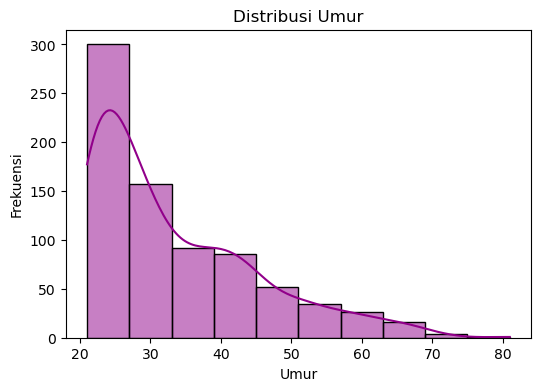

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Umur', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

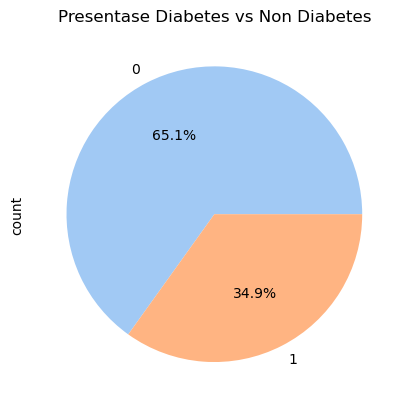

In [15]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Presentase Diabetes vs Non Diabetes")
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_16576\2383855657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Hasil', y='Umur', palette='rocket')


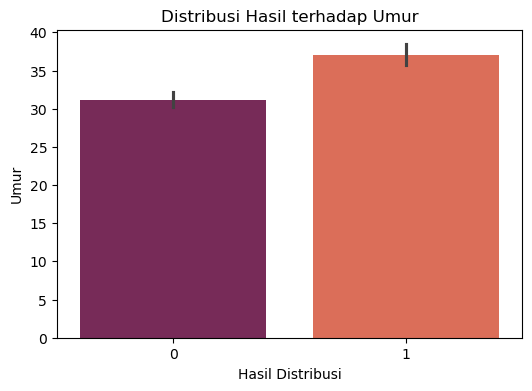

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Hasil', y='Umur', palette='rocket')

plt.title('Distribusi Hasil terhadap Umur')
plt.xlabel('Hasil Distribusi')
plt.ylabel('Umur')
plt.show()


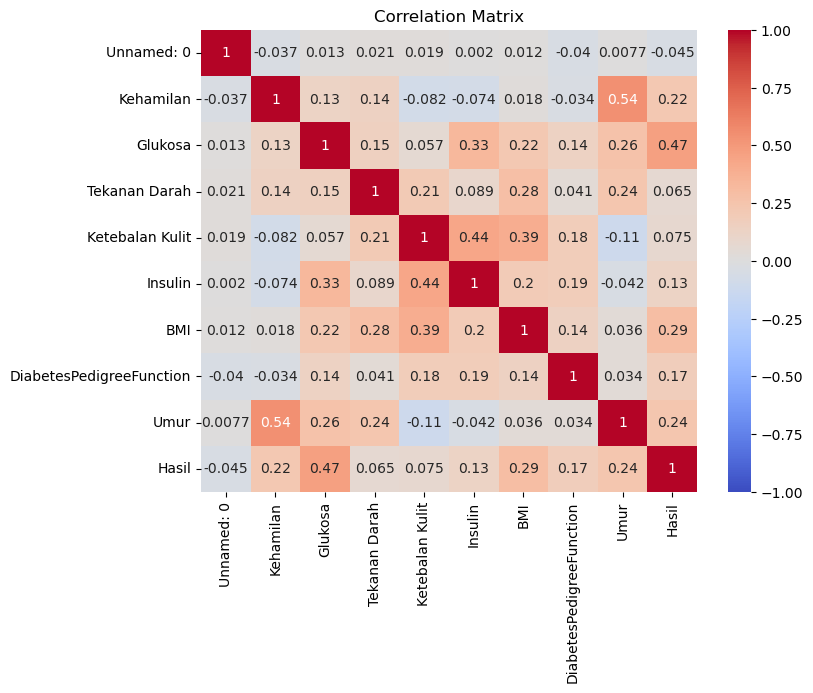

In [17]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


# 4.Preparation Data

In [38]:
X = df.drop(columns=['Hasil'])
y = df['Hasil']

print("X :" , X.shape)
print("Y :" , y.shape)

X : (768, 8)
Y : (768,)


In [40]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

# 5. Modelling

In [46]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%". format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Akurasi SVM : 75.97%


In [48]:

df.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Disini dalam dilihat bahwa akurasinya sebesar 75.35%

#

# 6. Testing

In [57]:
new_data = {
    'Kehamilan' : [6],
    'Glukosa' : [150],
    'Tekanan Darah' : [66],
    'Ketebalan Kulit' : [35],
    'Insulin' : [0],
    'BMI' : [30.6],
    'DiabetesPedigreeFunction' : [0.651],
    'Umur' : [31],
}

new_data = pd.DataFrame(new_data)
new_data #| = new_data.drop(columns=['Unnamed: 0'])

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,6,150,66,35,0,30.6,0.651,31


In [59]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print('Diagnosis Data Baru : ', y_pred_new)

Diagnosis Data Baru :  [1]
